In [1]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format



In [2]:
ny_crime_data = pd.read_csv('ny_offenses_known_to_law_enforcement_new_york_by_city_2013.csv', skiprows=4, skipfooter=3, engine='python')

ny_crime_data


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0,nan,0,12,18,405,99,291,15,0.000,nan


In [3]:
ny_crime_data.dropna(axis=1, how='all', inplace=True)
ny_crime_data.dtypes

City                                       object
Population                                 object
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(legacy\ndefinition)2                object
Robbery                                    object
Aggravated\nassault                        object
Property\ncrime                            object
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson3                                    float64
dtype: object

In [4]:
from sklearn.impute import SimpleImputer


In [5]:
ny_crime_data2 = pd.DataFrame()
ny_crime_data2['City'] = ny_crime_data['City']
ny_crime_data2['Population'] = ny_crime_data.Population.str.replace(',' , '').astype(int)
ny_crime_data2['Population2'] = ny_crime_data2['Population']**2
ny_crime_data2['Property Crime'] = ny_crime_data['Property\ncrime'].str.replace(',' , '').astype(int)
ny_crime_data2['Robbery'] = ny_crime_data.Robbery.str.replace(',' , '').astype(int)
ny_crime_data2['Robbery_bi'] = ny_crime_data2['Robbery'].apply(lambda x: 1 if x > 0 else 0)
ny_crime_data2['Murder'] = ny_crime_data['Murder and\nnonnegligent\nmanslaughter']
ny_crime_data2['Murder_bi'] = ny_crime_data2['Murder'].apply(lambda x: 1 if x > 0 else 0)

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
ny_crime_data2.head()
                                                 

,City,Population,Population2,Property Crime,Robbery,Robbery_bi,Murder,Murder_bi
0,Adams Village,1861,3463321,12,0,0,0,0
1,Addison Town and Village,2577,6640929,24,0,0,0,0
2,Akron Village,2846,8099716,16,0,0,0,0
3,Albany,97956,1005443344,4090,227,1,8,1
4,Albion Village,6388,40806544,223,4,1,0,0


In [6]:
ny_crime_data2.dtypes

City              object
Population         int32
Population2        int32
Property Crime     int32
Robbery            int32
Robbery_bi         int64
Murder             int64
Murder_bi          int64
dtype: object

In [24]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = ny_crime_data2['Property Crime']
X = ny_crime_data2[['Murder', 'Robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [123.30056694   5.24224911]

Intercept: 
 217.33428465316547

R-squared:
0.9976702716149838


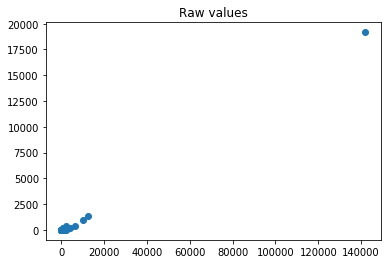

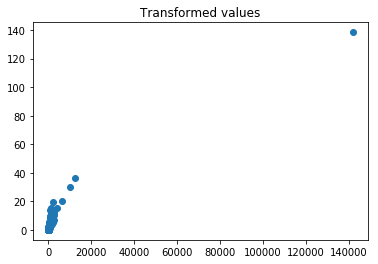

In [25]:
# Sample data.
outcome = ny_crime_data2['Property Crime']
feature = ny_crime_data2['Robbery']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

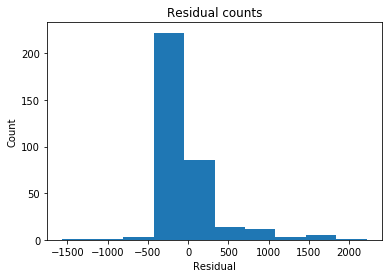

In [26]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = ny_crime_data2['Property Crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

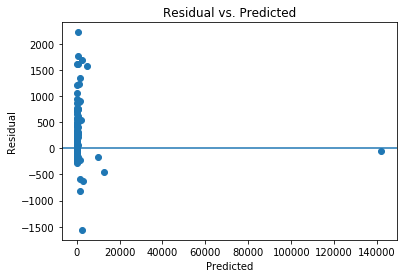

In [27]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()


In [28]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Murder,Robbery
Murder,1.000,0.993
Robbery,0.993,1.000
